In [ ]:
#importing all the modules required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings

warnings.filterwarnings(action="ignore")

In [27]:
df =  pd.read_csv('data/Pokemon.csv') 

In [19]:
df[["Name", "isLegendary"]].head(150)

,Name,isLegendary
0,Bulbasaur,False
1,Ivysaur,False
2,Venusaur,False
3,Charmander,False
4,Charmeleon,False
...,...,...
145,Moltres,True
146,Dratini,False
147,Dragonair,False
148,Dragonite,False


In [3]:
df.shape

(721, 23)

In [5]:
df.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [72]:
df.shape

(721, 23)

In [9]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


<Figure size 720x576 with 0 Axes>

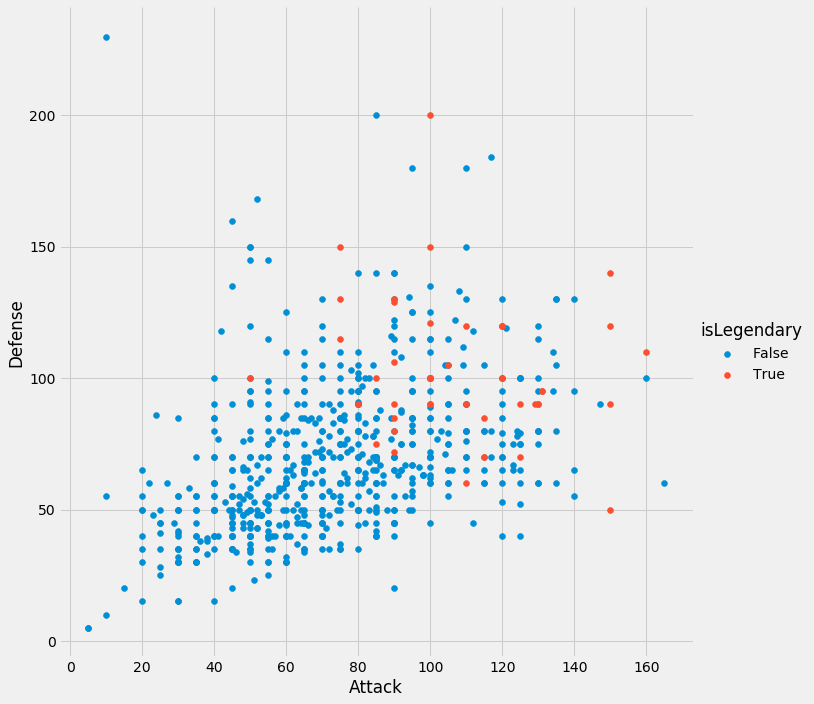

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.FacetGrid(df, hue="isLegendary", size = 10).map(plt.scatter, "Attack", "Defense").add_legend()

In [28]:
df = df.set_index('Name')
df2 = df[(df['Type_1']=='Fire')]
df2 = df2.drop('Generation', axis=1)
print("Fire Pokemon with Max HP:",df2['HP'].idxmax())
print("Fire Pokemon with Max SPEED:", df2['Speed'].idxmax())
print("Fire Pokemon with Max Sp.Attack:", df2['Sp_Atk'].idxmax())
print("Fire Pokemon with Max Sp.Defense:", df2['Sp_Def'].idxmax())
print("Fire Pokemon with Max Attack:", df2['Attack'].idxmax())
print("Fire Pokemon with Max Defense:", df2['Defense'].idxmax())

Fire Pokemon with Max HP: Entei
Fire Pokemon with Max SPEED: Talonflame
Fire Pokemon with Max Sp.Attack: Heatran
Fire Pokemon with Max Sp.Defense: Ho-Oh
Fire Pokemon with Max Attack: Darmanitan
Fire Pokemon with Max Defense: Torkoal


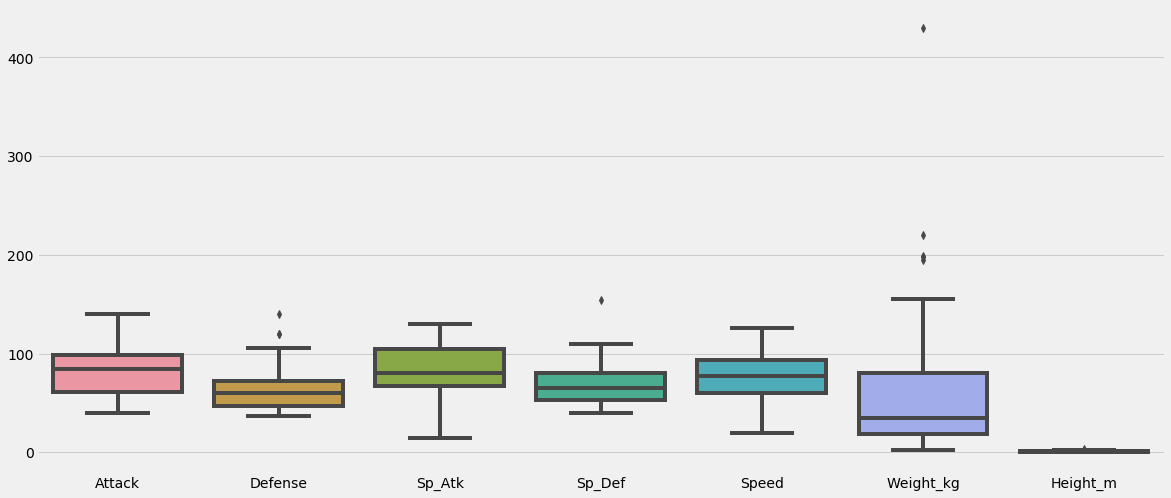

In [29]:
plt.figure(figsize=(18,8))

df3 = df[(df['Type_1']=='Fire')]#selecting fire type 
df3 = df3[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
sns.boxplot(data = df3)

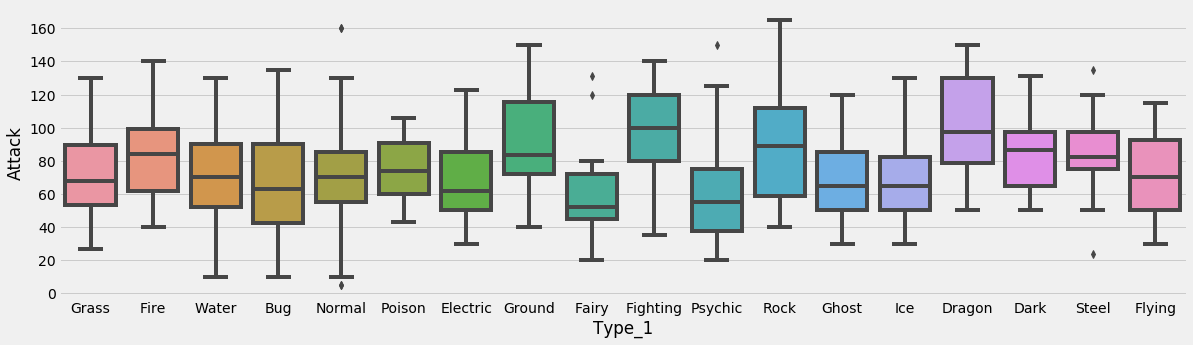

In [30]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="Type_1", y="Attack", data=df)

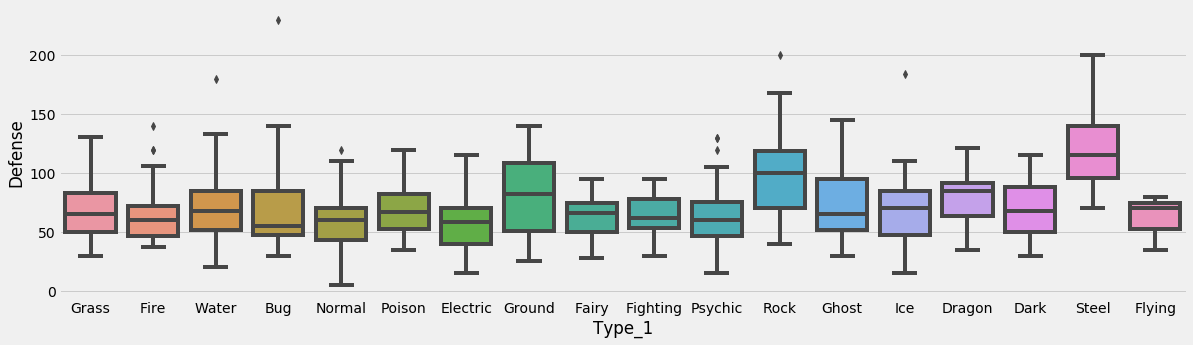

In [31]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="Type_1", y="Defense", data=df)

In [32]:
df.pivot_table(values='isLegendary',index=['Generation'],aggfunc=np.mean).reset_index()

,Generation,isLegendary
0,1,0.026490
1,2,0.050000
2,3,0.074074
3,4,0.102804
4,5,0.064103
5,6,0.083333


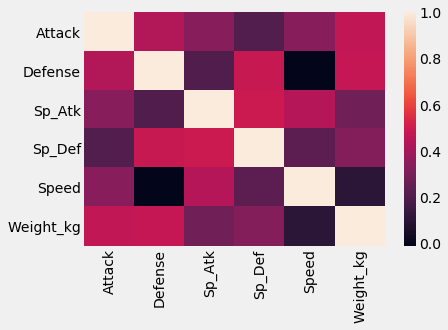

In [33]:
# plt.subplots(figsize = (18,5))
sns.heatmap(df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg"]].corr())

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X, df["isLegendary"])
predictions = logistic_model.predict(X)
accuracy = metrics.accuracy_score(predictions,df["isLegendary"])
print(accuracy)

0.9750346740638003


In [35]:
X

,Attack,Defense,Sp_Atk,Sp_Def,Speed,Weight_kg,Height_m
Name,,,,,,,
Bulbasaur,49,49,65,65,45,6.9,0.71
Ivysaur,62,63,80,80,60,13.0,0.99
Venusaur,82,83,100,100,80,100.0,2.01
Charmander,52,43,60,50,65,8.5,0.61
Charmeleon,64,58,80,65,80,19.0,1.09
...,...,...,...,...,...,...,...
Yveltal,131,95,131,98,99,203.0,5.79
Zygarde,100,121,81,95,95,305.0,5.00
Diancie,100,150,100,150,50,8.8,0.71


In [112]:
logistic_model.coef_

array([[ 0.00829422,  0.01804821,  0.03239595,  0.02280705,  0.02671366,
         0.00715198, -0.25145644]])

In [38]:
df = df.reset_index()
df["pred"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(X)]

df["prob"] = prob
selection = df[["Name","isLegendary","pred", "prob"]]
selection[selection["isLegendary"] == True].head()

,Name,isLegendary,pred,prob
143,Articuno,True,True,0.862581
144,Zapdos,True,True,0.901475
145,Moltres,True,True,0.842106
149,Mewtwo,True,True,0.999999
242,Raikou,True,True,0.984343


In [39]:
selection

,Name,isLegendary,pred,prob
0,Bulbasaur,False,False,2.236361e-12
1,Ivysaur,False,False,2.824668e-08
2,Venusaur,False,False,2.720638e-02
3,Charmander,False,False,3.805393e-12
4,Charmeleon,False,False,9.618027e-08
...,...,...,...,...
716,Yveltal,True,True,9.999867e-01
717,Zygarde,True,True,9.938750e-01
718,Diancie,True,True,9.989603e-01
719,Hoopa,True,True,9.618547e-01


In [40]:
logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)


NameError: name 'X_train' is not defined

In [96]:
train_accuracy

0.8908730158730159

In [97]:
test_accuracy

0.9262672811059908

In [98]:
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Precision:",metrics.precision_score(Y_test, pred_test))
print("Recall:",metrics.recall_score(Y_test, pred_test))

Accuracy: 0.9262672811059908
Precision: 0.4074074074074074
Recall: 1.0


### Note

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted Pokemon are Legendary, the Pokemon are actually Legendary 40% of the time.

Recall: If there are pokemon who are Legendary in the test set and your Logistic Regression model can identify it 100% of the time.

In [25]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_train, pred_train)
cnf_matrix

array([[414,  55],
       [  0,  35]])

Text(0.5, 257.44, 'Predicted label')

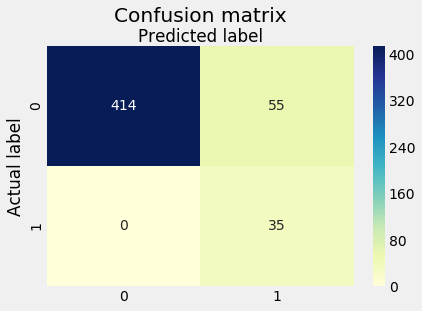

In [38]:
class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [174]:
data = df
def updateTypeColumn(dataframe, columnName, columnValue):
    for index, row in dataframe.iterrows():
        if row.Type_1 == columnValue:
            dataframe.loc[index, columnName] = 1
        else:
            dataframe.loc[index, columnName] = 0
            
updateTypeColumn(data, 'Type_1', 'Fire')
data['Type_1'] = data['Type_1'].apply(int) # Converts column to int

In [212]:
X.head()

,Attack,Defense,Sp_Atk,Sp_Def,Speed,Weight_kg,Height_m
0,49,49,65,65,45,6.9,0.71
1,62,63,80,80,60,13.0,0.99
2,82,83,100,100,80,100.0,2.01
3,52,43,60,50,65,8.5,0.61
4,64,58,80,65,80,19.0,1.09


In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   data["isFire"], 
                   test_size=0.7,  
                   train_size=0.3,    
                   random_state=42)


logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [221]:
test_accuracy

0.9267326732673268

In [198]:
data["isFire"] = data['Type_1'].apply(lambda x: True if x == 1 else False)

In [206]:
data[data["isFire"]==data["pred"]]

,level_0,index,Name,Number,Type_1,Type_2,Total,HP,Attack,Defense,...,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,pred,prob,isFire
0,0,0,Bulbasaur,1,0,Poison,318,45,49,49,...,Monster,Grass,False,0.71,6.9,45,quadruped,False,0.068975,False
1,1,1,Ivysaur,2,0,Poison,405,60,62,63,...,Monster,Grass,False,0.99,13.0,45,quadruped,False,0.059815,False
2,2,2,Venusaur,3,0,Poison,525,80,82,83,...,Monster,Grass,True,2.01,100.0,45,quadruped,False,0.052080,False
6,6,6,Squirtle,7,0,NaN,314,44,48,65,...,Monster,Water_1,False,0.51,9.0,45,bipedal_tailed,False,0.037242,False
7,7,7,Wartortle,8,0,NaN,405,59,63,80,...,Monster,Water_1,False,0.99,22.5,45,bipedal_tailed,False,0.030370,False
8,8,8,Blastoise,9,0,NaN,530,79,83,100,...,Monster,Water_1,True,1.60,85.5,45,bipedal_tailed,False,0.026424,False
9,9,9,Caterpie,10,0,NaN,195,45,30,35,...,Bug,NaN,False,0.30,2.9,255,insectoid,False,0.055280,False
10,10,10,Metapod,11,0,NaN,205,50,20,55,...,Bug,NaN,False,0.71,9.9,120,serpentine_body,False,0.030548,False
11,11,11,Butterfree,12,0,Flying,395,60,45,50,...,Bug,NaN,False,1.09,32.0,45,four_wings,False,0.087736,False
12,12,12,Weedle,13,0,Poison,195,40,35,30,...,Bug,NaN,False,0.30,3.2,255,serpentine_body,False,0.064391,False


In [217]:
data["pred"] = pred
prob =[x[1] for x in lm.predict_proba(X)]

# data["prob"] = prob
# selection = data[["Name","isLegendary","pred", "prob"]]
# selection[selection["Type_1"] == True].head()

In [218]:
sel = data[["Name","Type_1","pred", "prob"]]
sel

,Name,Type_1,pred,prob
0,Bulbasaur,0,False,0.068975
1,Ivysaur,0,False,0.059815
2,Venusaur,0,False,0.052080
3,Charmander,1,False,0.084723
4,Charmeleon,1,False,0.075264
5,Charizard,1,False,0.085258
6,Squirtle,0,False,0.037242
7,Wartortle,0,False,0.030370
8,Blastoise,0,False,0.026424
9,Caterpie,0,False,0.055280
